In [2]:
%load_ext autoreload
%autoreload 2
import sys, os
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as interp
from datetime import datetime
from matplotlib import colormaps as cm
from matplotlib import patches, lines
sys.path.append('../src/')
from Biologging_Toolkit.applications.Waves import Waves
from Biologging_Toolkit.utils.inertial_utils import *
plt.rcParams.update({
    "text.usetex": True,                # Enable LaTeX text rendering
    "font.family": "serif",             # Use a serif font
    "font.serif": ["Computer Modern"],  # Set font to Computer Modern (LaTeX default)
})

C:\Users\grosmaan\Desktop\Biologging_Toolkit\notebooks\../src\Biologging_Toolkit


In [14]:
depids = ['ml17_280a','ml18_296a','ml18_294b','ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_295a','ml21_305b']
depid = depids[6]
path = f'D:/individus_brut/individus/{depid}/'
raw_path = os.path.join(path, 'raw')
sens_path = os.path.join(path, f'{depid}sens5.nc')

In [15]:
inst = Waves(depid, path = path, raw_path = raw_path, sens_path = sens_path)
aux = pd.read_csv(os.path.join(path, f'aux_data.csv'))

In [16]:
inst.get_wave_period()

C:\Users\grosmaan\Desktop\Biologging_Toolkit\venv\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\grosmaan\Desktop\Biologging_Toolkit\venv\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


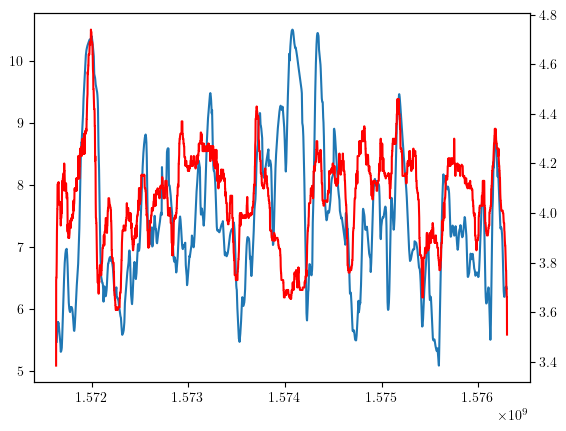

In [18]:
from scipy.ndimage import median_filter
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(aux.time[aux.mwp > 0], aux.mwp[aux.mwp > 0])
ax1.plot(inst.period_time, median_filter(inst.zc_period, size = 51, mode = 'constant'), c = 'r')